Trevor Snedden  
CSCV 471  
Competition 2  
Group: Solo  

<div style="text-align: center; font-size:30px;">Competition 2</div>


In [ ]:
import pandas as pd
from scipy.io import arff
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

Import test and training sets using pandas.read_csv()  
Perhaps i was being oblivious,but I didn't see the column names in the github repo so I got the columns from `https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection`. Though I did change one column name from 'attack' to 'attack_type' for clarity puposes.

In [60]:
test_file = 'KDDTest+.txt'
#column names for test and training sets
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack_type'
,'level'])

#import test set
df_test = pd.read_csv(test_file)
df_test.columns = columns

#import training set
train_file = 'KDDTrain+.txt'
df_train = pd.read_csv(train_file)
df_train.columns = columns


In [61]:
df_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type', 'level'],
      dtype='object')

In [62]:
# pd.concat to combine the two dataframes
combined_df = pd.concat([df_train, df_test], ignore_index=True)
combined_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type', 'level'],
      dtype='object')

In [63]:
#ensure no missing values
combined_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Examine class distribution using .value_counts()

In [64]:
#checkout the different type of attacks. encode to 'attack' and 'normal' later
attack_counts =  combined_df['attack_type'].value_counts()
attack_counts

attack_type
normal             77053
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm     

use matplotlib and seaborn to visualize the spread of attacks. This will allow easy comprehention oh the distribution of attacks

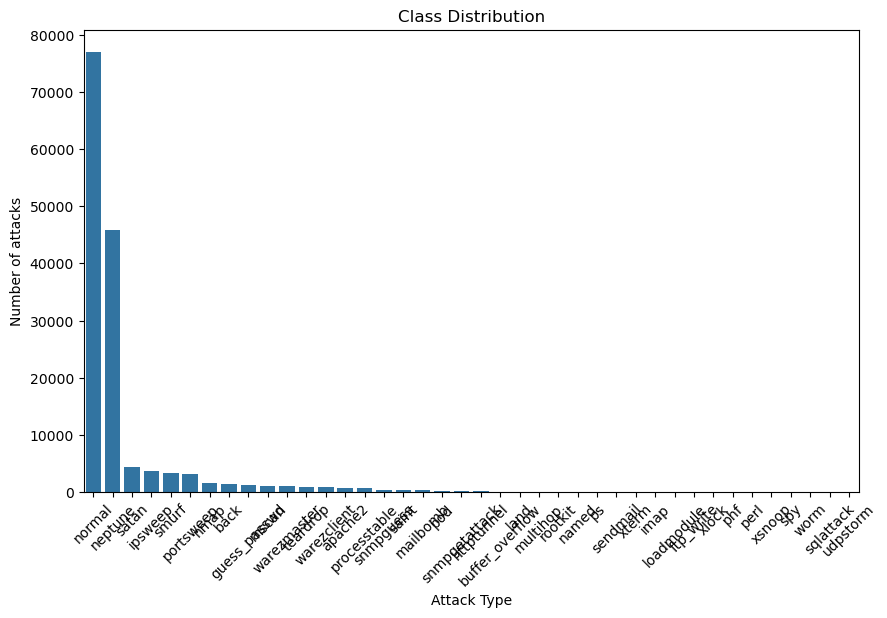

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x=attack_counts.index, y=attack_counts.values)
plt.title('Class Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Number of attacks')
plt.xticks(rotation=45)
plt.show()

last two underRepresented values. witht the above plot, we can see we can possibly reduce dimentionality. 

In [ ]:
underRepresented_values = attack_counts.nsmallest(2).index.tolist()
underRepresented_values

['spy']

In [67]:
# to find the categorical vals. 
combined_df.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.60,0.88,0.0,0.0,0.0,0.0,0.0,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.1,0.05,0.00,0.0,1.0,1.0,0.0,0.0,neptune,19


Computers can't 'read' categorical (string) values therefore encoding to be a computer readable value such as binary for example, label encoding will give each unique categorical value a noncategorical value  

In [68]:
# change categorical values with encoder except for attack col
cols_to_change= ['protocol_type', 'service', 'flag']

#loop through each col in the list then encode and fit
for col in cols_to_change:
    le = LabelEncoder()
    combined_df[col]= le.fit_transform(combined_df[col])

Use sklearn's train_test_split to split into training and test sets with a test size of 20%.  
Attack_type columns will only be in the test set since training will be done on a unsupervised model.   

In [ ]:
underrepresented_data = combined_df[combined_df['attack_type'].isin(['spy', 'worm'])]
#exclude spy and worm form combined
remaining_data = combined_df[~combined_df['attack_type'].isin(['spy', 'worm'])]

print(f'distribution of spy and worm before splitting:\n{underrepresented_data['attack_type'].value_counts()}\n')

#perform stratification to help not exclude underrepresented data
train_set_remaining, test_set_remaining = train_test_split(
    remaining_data, test_size=0.2, random_state=53, stratify=remaining_data['attack_type']
)

#combine underrepresented data with the stratified data.
train_set = pd.concat([train_set_remaining, underrepresented_data], ignore_index=True)
test_set = pd.concat([test_set_remaining, underrepresented_data], ignore_index=True)

#check distribution after split
print(f"post train split distribution\n{train_set['attack_type'].value_counts()}\ntest_set: {test_set['attack_type'].value_counts()}")

distribution of spy and worm before splitting:
attack_type
spy     2
worm    2
Name: count, dtype: int64

post train split distribution
attack_type
normal             61642
neptune            36696
satan               3494
ipsweep             2992
smurf               2649
portsweep           2470
nmap                1253
back                1052
guess_passwd        1027
mscan                797
warezmaster          771
teardrop             723
warezclient          712
apache2              590
processtable         548
snmpguess            265
saint                255
mailbomb             234
pod                  194
snmpgetattack        142
httptunnel           106
buffer_overflow       40
multihop              20
land                  20
rootkit               18
named                 14
ps                    12
sendmail              11
imap                  10
xterm                 10
loadmodule             9
ftp_write              9
xlock                  7
phf                    5
pe

Use skleanrs StandardScaler() to normalize features to help the model not be biased towards the varying features such as the two lowest under represented  features found above. 

In [70]:
scaler = StandardScaler()
# only x features ot scale since y is what needs to be predicted
#fit_transform only on the data being trained since it transforms and fits the data
x_train = scaler.fit_transform(x_train)
#only need to trasform since not training with this test data.
x_test = scaler.transform(x_test)

In [71]:


model = RandomForestClassifier(random_state=14)

#fit the model
model.fit(x_train, y_train)

#make predictions on test set
y_pred = model.predict(x_test)
#evaluate the model
print(classification_report(y_test, y_pred))



c:\Users\snedd\anaconda3\envs\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 precision    recall  f1-score   support

        apache2       1.00      0.99      1.00       147
           back       1.00      1.00      1.00       263
buffer_overflow       0.56      0.90      0.69        10
      ftp_write       0.00      0.00      0.00         2
   guess_passwd       0.99      1.00      0.99       257
     httptunnel       1.00      0.89      0.94        27
           imap       1.00      1.00      1.00         2
        ipsweep       1.00      1.00      1.00       748
           land       1.00      1.00      1.00         5
     loadmodule       0.00      0.00      0.00         2
       mailbomb       1.00      1.00      1.00        59
          mscan       0.99      1.00      1.00       199
       multihop       0.50      0.40      0.44         5
          named       0.67      0.67      0.67         3
        neptune       1.00      1.00      1.00      9174
           nmap       0.99      1.00      1.00       313
         normal       1.00    

c:\Users\snedd\anaconda3\envs\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\snedd\anaconda3\envs\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SHAP 

In [73]:
import shap


In [ ]:
#useing TreeExpaliner since using a tree
explainer = shap.TreeExplainer(model)

shap_vals = explainer.shap_values(x_test)
shap_vals


array([[[ 7.08284669e-02, -3.08315570e-02,  1.48043475e-03, ...,
          4.66647383e-04,  4.19150379e-05,  1.88244892e-04],
        [ 1.25498530e-02,  1.46448664e-03,  1.24525465e-04, ...,
          2.52554374e-05,  9.53691249e-06,  2.50715946e-05],
        [ 3.99494131e-02,  5.15159747e-03, -1.56627818e-04, ...,
          4.96706215e-05, -1.81338127e-05,  1.09152117e-05],
        ...,
        [ 2.95125678e-02,  1.20235430e-02,  2.16786956e-04, ...,
          3.61253046e-04, -1.33710609e-05, -1.53658164e-04],
        [ 4.14124313e-02,  4.28313174e-03,  7.24068103e-04, ...,
         -2.39425360e-04, -6.50897722e-06, -1.96023906e-06],
        [ 9.88858700e-02,  2.54461673e-02,  6.86235754e-04, ...,
          2.08153136e-04,  1.66097732e-05,  1.17559803e-04]],

       [[-1.40035733e-03,  6.10668081e-04, -1.21494533e-04, ...,
         -4.92958292e-06, -3.81308224e-06,  2.50783241e-06],
        [ 4.25787810e-04,  1.21875129e-04,  6.40690040e-05, ...,
          1.11153006e-05,  6.83273615e

summary plot will show global feature ranked by importance

<Figure size 2000x1000 with 0 Axes>

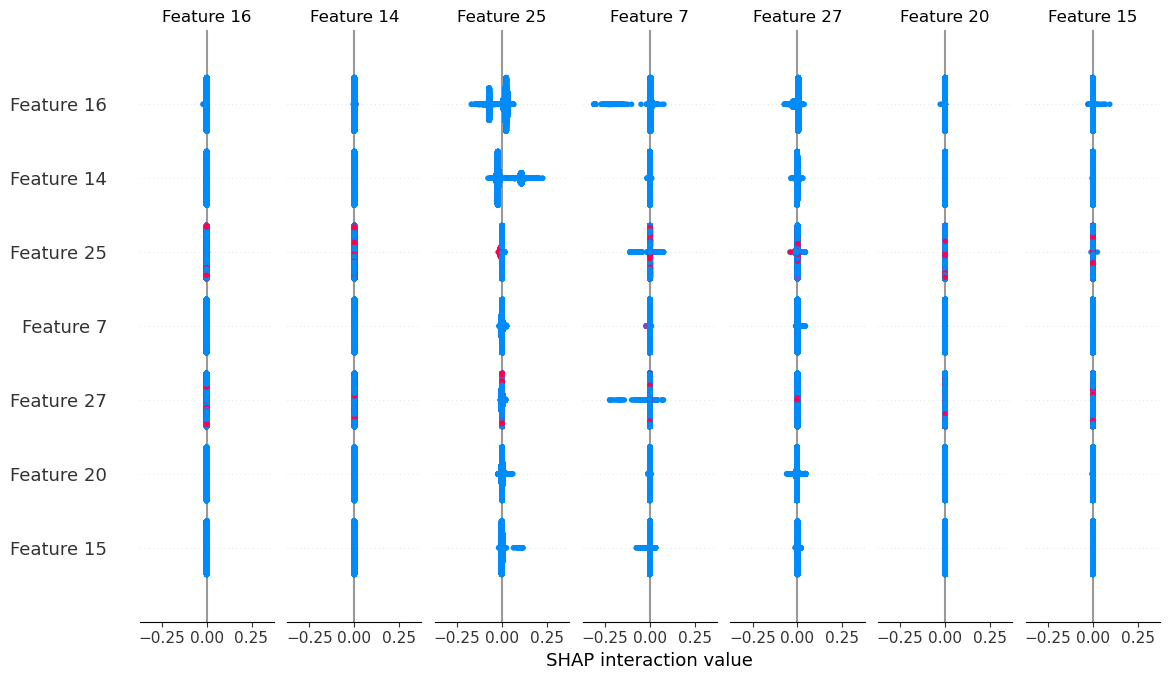

In [75]:
plt.figure(figsize=(20,10))
shap.summary_plot(shap_vals, x_test)
plt.show()


summary plot of under-represented attacks from part 1. 

In [76]:
unique = y_test.unique()
#lets be sure im not overlooking 
print('worm' in unique)
print('spy' in unique)

print(combined_df.loc[combined_df['attack_type']=='worm'])
print(combined_df.loc[combined_df['attack_type']=='spy'])

True
True
        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
129082         9              1       60     9       4209       7919     0   
143596         9              1       60     9       4209       7872     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
129082               0       0    0  ...                    0.02   
143596               0       0    0  ...                    0.01   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
129082                    0.04                         0.01   
143596                    0.07                         0.01   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
129082                          0.0                   0.0   
143596                          0.0                   0.0   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
129082                       0.0                   0.0   
143596                       0.0                   0.0   

 

having issues testing the underrated attack. debuging process here.  
x_test_attack length coming back 0. no instances of the attack_type being shown.  'spy' nor 'worm' not being shown in y_test.unique()...it shows in the underRepresented_values... why...  
Worm and spy are in the combined_df. excluded somewhere after split...  
Train_test_split appears to be excluding from test set. added stratify arg to the function to preserve the small set, but still did not get added.  
going to try SMOTE to help out the under represented features since i've had good luck with smote before. smote partially worked but became overengineered to get working. taking a step back and look how to manually ensure it is included.  
solution: get the features before split. Post plitting,  concat the the df with missing features with the extracted features var that whwere excluded. this ensures the values are there after split.


2


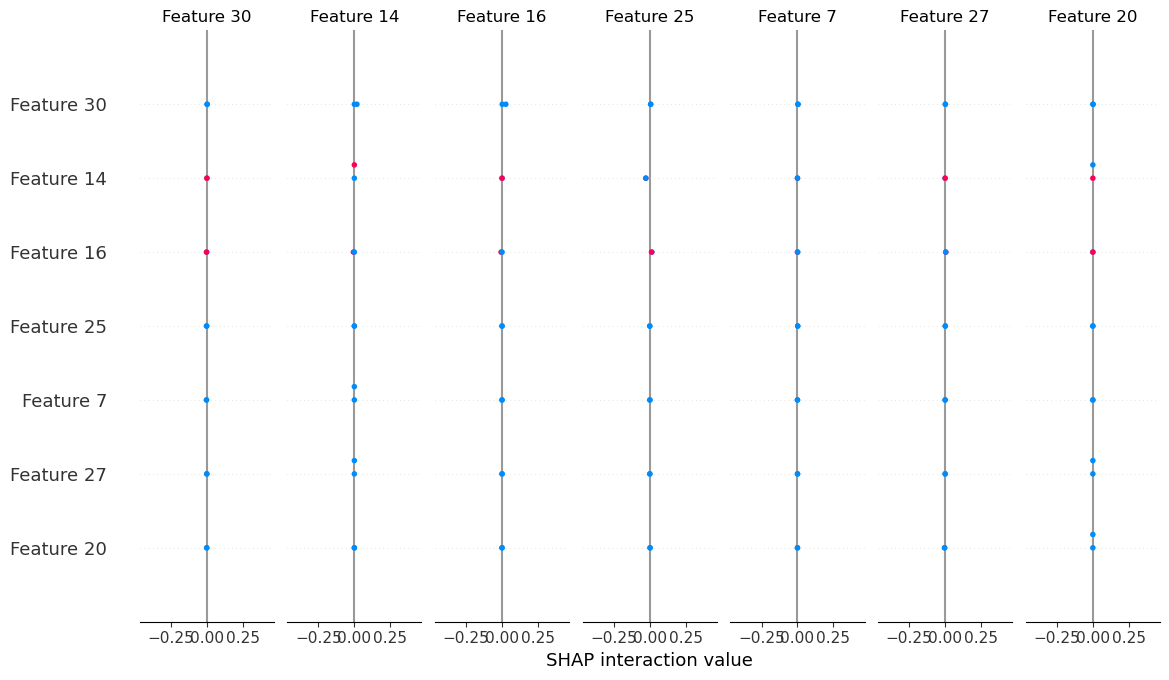

In [103]:
#since part one has to be from original df before changing all attacks to attack
#underRepresented_values
attack_types = ['spy']
x_test_attack = x_test[y_test.isin(attack_types)]
print(len(x_test_attack))
y_test_attack = y_test[y_test.isin(attack_types)]

if len(x_test_attack) > 0:
    shap_values_attack = explainer.shap_values(x_test_attack)
    shap.summary_plot(shap_values_attack, x_test_attack)
else:
    print("No data for the specified attack type.")


Dependence plot to identiryf the most significant features.  

Where did i go wrong for the dependence_plot? Should I have put it back into a pandas df after encoding? 

In [105]:
print(shap_vals[0].shape)
print(len(x_test_attack))

(42, 40)
2


AssertionError: 'shap_values' and 'features' values must have the same number of rows!

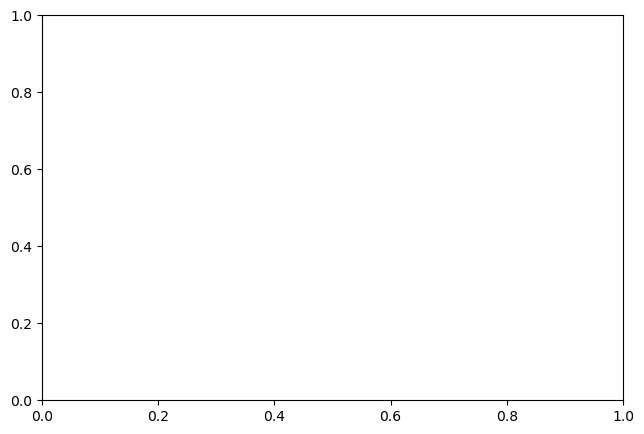

In [110]:

shap.dependence_plot(30, shap_vals[0],x_test_attack)

### Trust and Transparancy 

Within the world of AI it is important to understand the decision making progress. Having a model that is not understood can lead to undesirable outcomes such as in the cybersecurity world where AI models are used as a line of defense. Without some sort of explanation the results can never truly be trusted. Transparency enduces confidence since there are no secrets the model is hidding allowing an understanding.

SHAP allows the user a look through the peeping glass on how it interacts with the features. It proves a visual analysis that gives an easy to read plot. With the SHAP providing readable insight into the prosses professionals can see how specific features affect the model's predictions, allowing them to verify whether the decisions are appropriate for the situation esspecially since cyber threats are inconsistant. Having the insight allows for further model tuning and feature engineering by showing which features are playing the biggest role, but it can also show where to adjust the features.

#### Recommendations

some recomendations for further modle improvment would be feature selection since the SHAP reveals which features make differences. reducing redundent or uneeded features can open the mdoel up to better performance. If the SHAP uncovers biases in the model it opens the user to better data augmentations, can highlight the use of rebalancing the data such as the 'worm' to create matching dummy values to imitate and increate the amount of features. Using the SHAP in regular perfomance maintanence and analysis can help further improve models detection capabilities. 